In [64]:
import sys
sys.path.append(r'c:\\Users\\cesar\\OneDrive\\Documents\\adrien\\GitHub\\bayesian_shrinkage')

In [66]:
import numpy as np
import pandas as pd

from src.model import GLSP_count, GLSP_count_reg
from src.graph import comp_scatter_plot, comp_conf_interv

In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
df = pd.read_csv('../data/DC_covid_preprocess.csv').set_index("dep")
df_covariables = pd.read_csv('../data/covariables.csv').sort_values(by = "Departement").set_index("Departement")

In [23]:
results = GLSP_count(df["Mort"].values, prior = "PG")

In [141]:
PG_tirage = GLSP_count_reg(df["Mort"].values, df_covariables.values, prior = "PG", mc = 10000, burn = 1500)
IG_tirage = GLSP_count_reg(df["Mort"].values, df_covariables.values, prior = "IG", mc = 10000, burn = 1500)
EH_tirage = GLSP_count_reg(df["Mort"].values, df_covariables.values, prior = "EH", mc = 10000, burn = 1500)

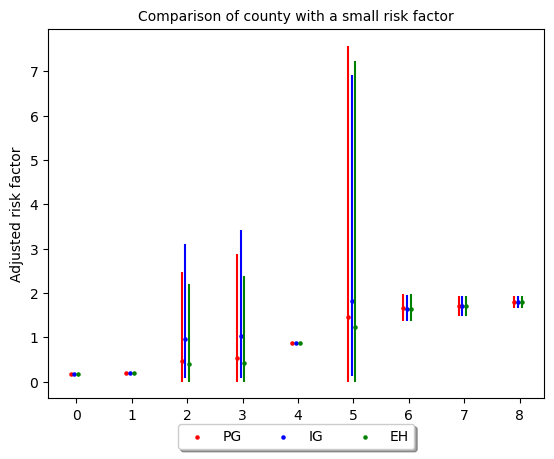

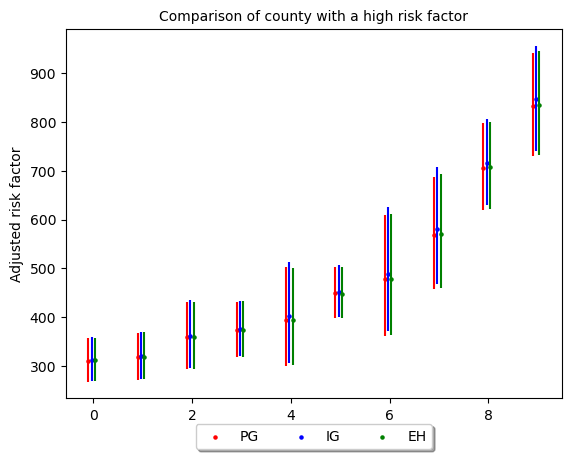

In [142]:
mcmc_array = [PG_tirage[0], IG_tirage[0], EH_tirage[0]]
dic_mean = {i : [] for i in range(len(mcmc_array))}

for method in range(len(mcmc_array)) :
    dic_mean[method] = np.mean(mcmc_array[method], axis = 0)

df_EH = pd.DataFrame({"dep" : df.index, "number" : [i for i in range(dic_mean[2].shape[0])], "lambda" : dic_mean[2]})
df_EH = df_EH.sort_values(by = "lambda")


comp_conf_interv([PG_tirage[0][:,df_EH["number"].iloc[0:9].values], IG_tirage[0][:,df_EH["number"].iloc[0:9].values], EH_tirage[0][:,df_EH["number"].iloc[0:9].values]], nom_graph = 'Comparaison_individu_avec_intervalle_de_confiance_min', title = 'Comparison of county with a small risk factor')
comp_conf_interv([PG_tirage[0][:,df_EH["number"].iloc[-10:]], IG_tirage[0][:,df_EH["number"].iloc[-10:]], EH_tirage[0][:,df_EH["number"].iloc[-10:]]], nom_graph = 'Comparaison_individu_avec_intervalle_de_confiance_max', title = 'Comparison of county with a high risk factor')

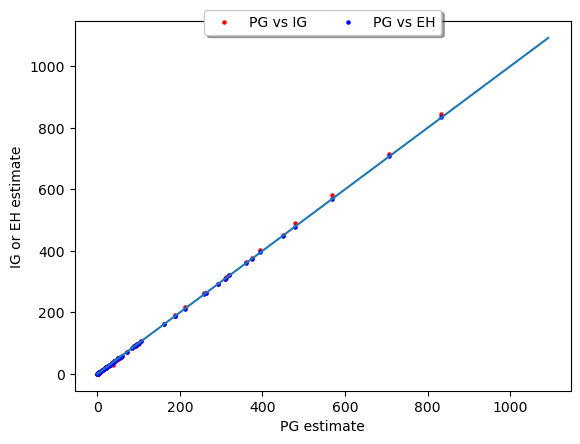

In [143]:
#Pointwise comparison of estimates : 
comp_scatter_plot([PG_tirage[0], IG_tirage[0], EH_tirage[0]], nom_graph = 'Comparaison_pointwise', title = 'Pointwise comparison of county')

In [88]:
df_total = pd.read_csv('../data/total.csv')

In [144]:
PG_tirage_2 = GLSP_count_reg(df_total.values, df_covariables.values, prior = "PG", mc = 10000, burn = 1500)
IG_tirage_2 = GLSP_count_reg(df_total.values, df_covariables.values, prior = "IG", mc = 10000, burn = 1500)
EH_tirage_2 = GLSP_count_reg(df_total.values, df_covariables.values, prior = "EH", mc = 10000, burn = 1500)

NameError: name 'df_total' is not defined

In [ ]:
mcmc_array = [PG_tirage_2[0], IG_tirage_2[0], EH_tirage_2[0]]
dic_mean = {i : [] for i in range(len(mcmc_array))}

for method in range(len(mcmc_array)) :
    dic_mean[method] = np.mean(mcmc_array[method], axis = 0)

df_EH = pd.DataFrame({"dep" : df.index, "number" : [i for i in range(dic_mean[2].shape[0])], "lambda" : dic_mean[2]})
df_EH = df_EH.sort_values(by = "lambda")


comp_conf_interv([PG_tirage_2[0][:,df_EH["number"].iloc[0:9].values], IG_tirage_2[0][:,df_EH["number"].iloc[0:9].values], EH_tirage_2[0][:,df_EH["number"].iloc[0:9].values]], nom_graph = 'Comparaison_individu_avec_intervalle_de_confiance_min_full_year', title = 'Comparison of county with a small risk factor')
comp_conf_interv([PG_tirage_2[0][:,df_EH["number"].iloc[-10:]], IG_tirage_2[0][:,df_EH["number"].iloc[-10:]], EH_tirage_2[0][:,df_EH["number"].iloc[-10:]]], nom_graph = 'Comparaison_individu_avec_intervalle_de_confiance_max_full_year', title = 'Comparison of county with a high risk factor')

,Mort
dep,
01,190
02,80
03,102
04,10
05,20
...,...
91,216
92,2262
93,382


In [ ]:
comp_scatter_plot([PG_tirage_2[0], IG_tirage_2[0], EH_tirage_2[0]], nom_graph = 'Comparaison_pointwise_full_year', title = 'Pointwise comparison of county')